In [1]:
# which excels?

# for each excel
# get the variations block
# copy it at the bottom of the Comparison tExcel


In [2]:
from pathlib import Path
import xlwings
from utils import excel

excel_paths = [
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_Aichinger_211105.xlsb",
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_AmBichl_211105.xlsb",
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_Glan_211105.xlsb",
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_Gneis_211105.xlsb",
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_Graz_211105.xlsb",
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\PlusenergieExcel_Pilzgasse_211105.xlsb",
]

paths = [Path(ep) for ep in excel_paths]

aggregation_excel_path = Path(
    r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\ZQ Austria\Quartiersdaten\Quartiersvergleich211108.xlsm")
aggregation_sheet = "PEExcel Import"

In [3]:
# for path in paths:
#     excel.append_variations_to_aggregation_sheet(
#         peexcel_path=path,
#         agg_book_path=aggregation_excel_path,
#         agg_sheet_name=aggregation_sheet,
#         close_after=True
#     )

In [4]:
import pandas as pd
aggbook = xlwings.Book(aggregation_excel_path)

def varianten(
        book:xlwings.Book,
        aggregation_sheet:str,
        rowstart=2,
        rowstop=134,
        colstop=401
) -> pd.DataFrame:

    vars = book.sheets[aggregation_sheet]
    range = vars[rowstart:rowstop, :colstop]
    df = range.options(pd.DataFrame, index=False).value
    return df

df = varianten(aggbook, aggregation_sheet)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Columns: 401 entries, idx to ende result saving area
dtypes: bool(12), datetime64[ns](1), float64(356), object(32)
memory usage: 399.8+ KB


In [5]:
# find a certain variation from the list

df[
    (df["Variantenname"]=="Alpha - Aktuell") &
    (df["Projekt"]=="Aichinger")
]

,idx,Variantenname,NaN,Simulation,Berechnungszeitpunkt,FILE,Projekt,Wohnbau NGF (m²),Büro NGF (m²),Schule NGF (m²),...,Netzstrom,Abwärme,Summe,GFZ,PE-Saldo Zielwert [kWh/m²NGF],PE-Saldo Ziel Real[kWh/m²BGF],PE-Saldo Zielwert Großkraftwerke [kWh/m²NGF],diese zellen sind mit ergbnisverweisen befüllbar,diese zellen sind mit ergbnisverweisen befüllbar,ende result saving area
1,2.0,Alpha - Aktuell,Aichinger 2 Alpha - Aktuell,Doppelsimulation,2021-10-15 10:31:51,C:\Users\Simon Schneider\Nextcloud\EE\1_Forsch...,Aichinger,4098.7,0.0,0.0,...,18.849405,0.0,48.337082,0.751286,24.585498,19.161168,84.175930,None,None,None
11,2.0,Alpha - Aktuell,Aichinger 2 Alpha - Aktuell,Doppelsimulation,2021-11-03 12:21:27,C:\Users\Simon Schneider\Nextcloud\EE\1_Forsch...,Aichinger,4098.7,0.0,0.0,...,0.000000,0.0,45.972246,0.688857,28.116259,23.898820,-3.438084,None,None,None


In [21]:
import numpy as np
from utils.targets import ZQSynergy
GFZ = np.linspace(0.0, 8, 800) #min, max, steps
PEQ_alfa = pd.DataFrame({
    "":np.zeros(len(GFZ)),
    "Zielwert Alpha (PEQ okt 2021)": ZQSynergy().alpha_zielwert_ngf(GFZ=GFZ),

}, index=GFZ)


TypeError: ZQSynergy() takes no arguments

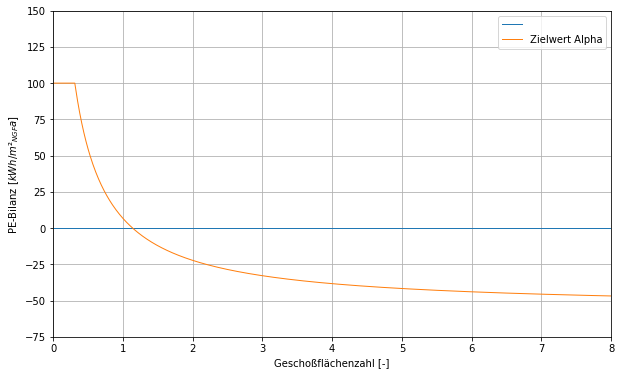

In [7]:
import matplotlib.pyplot as plt
from utils.plotting import target_of_gfz

fig, ax = plt.subplots(1,1, figsize=(10,6))
target_of_gfz(ax=ax, df=PEQ_alfa)
ax.set_ylabel("PE-Bilanz $[{kWh/m²_{NGF}a}]$")

In [8]:
cols = {
"Alpha - Bauträger Standard": 1.0,
"Alpha - Aktuell": 2.0,
"Alpha - Netzdienlichkeit": 3.0,
"Alpha - Min PEQ": 4.0,
"Alpha - Min PEQ - Nutzerstrom 75%": 4.5,
"Beta - Bauträger Standard": 5.0,
"Beta - Aktuell": 6.0,
"Beta - Netzdienlichkeit": 7.0,
"Beta - Min PEQ": 8.0,
"Beta - Min PEQ - Nutzerstrom 75%": 8.5,
"Omega - Bauträger Standard": 9.0,
"Omega - Aktuell": 10.0,
"Omega - Netzdienlichkeit": 11.0,
"Omega - Min PEQ": 12.0,
"Omega - Min PEQ - Nutzerstrom 75%": 12.5,
}

new_df = df[
    (df.FILE != "None")
]

df = new_df

In [9]:
dsm_df = new_df[
    (new_df.index.isin([4.0,4.5]))
]
dsm_df


,idx,Variantenname,NaN,Simulation,Berechnungszeitpunkt,FILE,Projekt,Wohnbau NGF (m²),Büro NGF (m²),Schule NGF (m²),...,Netzstrom,Abwärme,Summe,GFZ,PE-Saldo Zielwert [kWh/m²NGF],PE-Saldo Ziel Real[kWh/m²BGF],PE-Saldo Zielwert Großkraftwerke [kWh/m²NGF],diese zellen sind mit ergbnisverweisen befüllbar,diese zellen sind mit ergbnisverweisen befüllbar,ende result saving area
4,5.0,Beta - Bauträger Standard,Aichinger 5 Beta - Bauträger Standard,Doppelsimulation,2021-10-18 23:22:35,C:\Users\Simon Schneider\Nextcloud\EE\1_Forsch...,Aichinger,4098.7,0.0,0.0,...,26.328382,0.0,45.541339,0.751286,24.585498,19.161168,-0.657976,None,None,None


In [10]:
# get variants
# s2 = aggbook.sheets[4]
# local_addr = s2["M5"].formula.split("!")[1]
# aggsheet = aggbook.sheets[aggregation_sheet]
# new_df.columns[aggsheet[local_addr].column-2]

we commonly need to transform the df into a flat version,
 with an additional column *calc_type*:
 * Erdgas,
 * FW,
 * HP /wo DSM,
 * HP /w DSM


In [11]:
# df_inputs
vars = aggbook.sheets[aggregation_sheet]
range = vars[2:134, :204]
df_inputslarge = range.options(pd.DataFrame, index=False).value
df_gfzblock = vars[2:134, 394:397].options(pd.DataFrame, index=False).value
#joining GFZ shit
df_inputs = df_gfzblock.join(df_inputslarge)

In [12]:
# df_gas
range = vars[1:134, 204:224]
df_gas = range.options(pd.DataFrame, index=False).value
df_gas["energy_system"] = "Erdgas"
# df_distheat
range = vars[1:134, 224:244]
df_distheat = range.options(pd.DataFrame, index=False).value
df_distheat["energy_system"] = "Fernwärme"
# df_HPwoDSM
range = vars[1:134, 244:264]
df_HPwoDSM = range.options(pd.DataFrame, index=False).value
df_HPwoDSM["energy_system"] = "Wärmepumpe (OHNE DSM)"
# df_HPwDSM
range = vars[1:134, 308:328]
df_HPwDSM = range.options(pd.DataFrame, index=False).value
df_HPwDSM["energy_system"] = "Wärmepumpe (mit DSM)"

In [13]:
# concatenate all dfs
i = np.arange(132)
df1 = pd.concat([df_gas, df_inputs], axis=1)#.set_index([i,i]).reset_index(level=0)
i2 = i+132
df2 = pd.concat([df_distheat, df_inputs], axis=1)#.set_index([i,i2]).reset_index(level=0)
i3 = i2+132
df3 = pd.concat([df_HPwoDSM, df_inputs], axis=1)#.set_index([i,i3]).reset_index(level=0)
i4 = i3+132
df4 = pd.concat([df_HPwDSM, df_inputs ], axis=1)#\
 #   .set_index([i,i4], drop=True)\
#    .reset_index(level=0)

# df.shape

In [14]:
from enum import Enum, auto
# vars["K2"].value
class EnerSys(Enum):
    gas = auto()
    dh = auto()
    hp_wo_dsm = auto()
    hp_w_dsm = auto()

In [15]:
for n in EnerSys:
    print(n)

EnerSys.gas
EnerSys.dh
EnerSys.hp_wo_dsm
EnerSys.hp_w_dsm


In [16]:

result_map_NGF = {
    EnerSys.gas: {
        "PEBedarf": {"abc": "GW", "num":204},
        "PEExport": {"abc": "GX", "num":205},
        "PESaldo": {"abc": "GY", "num":206},
        "Alpha - Dichteausgleich [kWh/m²NGF]": {
            "abc": "HA", "num":208},
    },
    EnerSys.dh: {
        "PEBedarf": {"abc": "HQ", "num":224},
        "PEExport": {"abc": "HR", "num":225},
        "PESaldo": {"abc": "HS", "num":226},
        "Alpha - Dichteausgleich [kWh/m²NGF]": {
            "abc": "HU", "num":228},
    },
    EnerSys.hp_wo_dsm: {
        "PEBedarf": {"abc": "IK", "num":244},
        "PEExport": {"abc": "IL", "num":245},
        "PESaldo": {"abc": "IM", "num":246},
        "Alpha - Dichteausgleich [kWh/m²NGF]": {
            "abc": "IO", "num":248},
    },
    EnerSys.hp_w_dsm: {
        "PEBedarf": {"abc": "KW", "num":308},
        "PEExport": {"abc": "KX", "num":309},
        "PESaldo": {"abc": "KY", "num":310},
        "Alpha - Dichteausgleich [kWh/m²NGF]": {
            "abc": "LA", "num":312},
    }
}


In [17]:
def address(system:EnerSys, index, col:str, row_offset=3, mapping=result_map_NGF):
    addr = mapping[system][col]["abc"]
    return addr+str(index+row_offset)


In [18]:
aggsheet = vars
a1 = address(EnerSys.hp_wo_dsm, 0, "PEBedarf")
aggsheet[a1].value

'PEBedarf'

In [19]:
df1["PEBedarf"]

KeyError: 'PEBedarf'

Zuerst einmal ein Sanity check:
In welchen Input Kategorien unterscheiden sich die Varianten nicht?

In [ ]:
projects = df_inputs.Projekt.unique()
projects

In [ ]:
varianten = df_inputs.Variantenname.unique()
varianten


In [ ]:
bauweisen = df_inputs["Gewählte Variante"].unique()
bauweisen, len(bauweisen)

In [ ]:
sonnenschutz = df_inputs["Mobiler Sommerlicher Sonnenschutz"].unique()
sonnenschutz, len(sonnenschutz)


In [ ]:
view2 = df2[df2.idx.isin([1.,5.,9.])].copy()
view3 = df3[df3.idx.isin([2.,6.,10.])].copy()
view4 = df4[df4.idx.isin([3.,4.0,4.5,7.,8.,8.5,11.,12.,12.5])].copy()
view = pd.concat([view2,view3, view4])

In [ ]:
view = view[view.FILE != "None"]

In [ ]:
aggbook.sheets["Varianten"]["A1"].value     = view

In [ ]:
import seaborn as sns

alfa = view[view["Variantenname"].str.contains("Alpha")]
alfa["PEExport"]

In [ ]:
sns.scatterplot(data=alfa,
            x="PEBedarf",
            y="PEExport",
            hue="Projekt")

In [ ]:
from utils.targets import target
var = alfa.iloc[0]
# var
peb = var["PEBedarf"]
pee = var["PEExport"]
peb, pee

In [ ]:
var

In [ ]:
za = ZQSynergy().alpha_zielwert_ngf(var["GFZ"])

plt.bar([])